# Example of univariant linear regression

In [311]:
import numpy as np
import pandas as pd

In [312]:
# read and build input dataset
data_src = 'data/ex1data1.txt'
training_data = pd.read_csv(data_src,header=None,names=['population','profit'])
X = np.array(training_data['population'])
y = np.array(training_data['profit'])
# X = np.stack((X,np.ones([len(X)])),axis=1)

In [313]:
# Generate auxiliary vector [1 x x^2 x^3 ... x^d] 
dimension = 2
X_dash = X
for d in range(0,dimension):
    aux_list = [math.pow(x,d) for x in X]
    X_dash = np.column_stack((X_dash,np.array(aux_list)))
X = X_dash[:,1:]

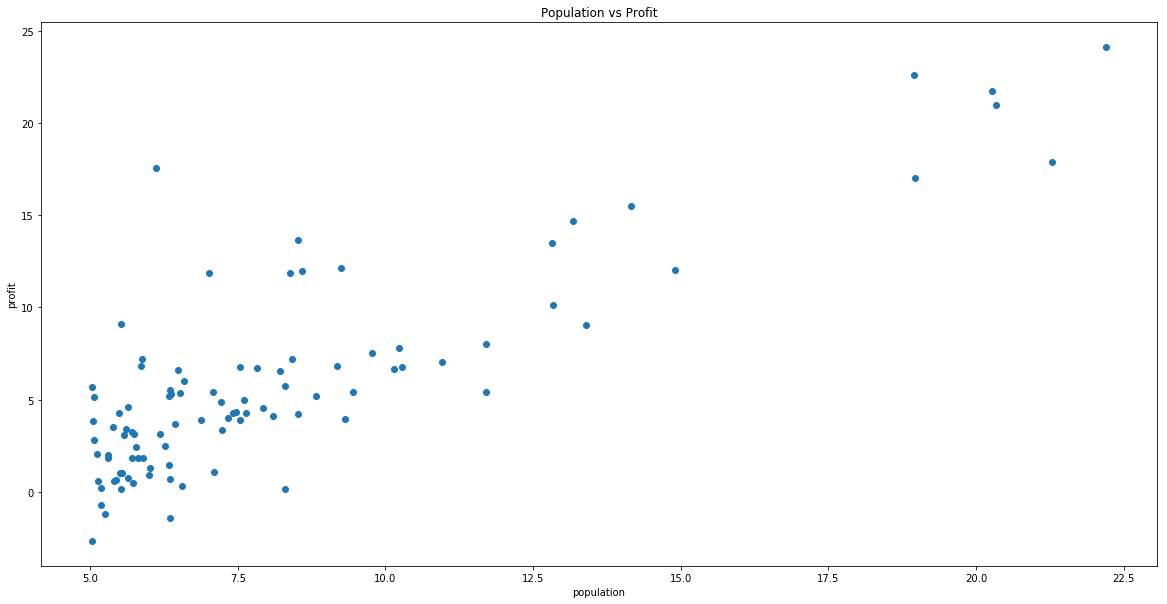

In [314]:
# visualize population vs profit data
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(X[:,1],y)
plt.title('Population vs Profit')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [315]:
# cost function
def eval_cost_function(theta,X,y):
    '''
        Cost function of linear regression
    '''
    n = len(X)
    return (1/2/n)*np.sum((X.dot(theta.T)-y)**2) 

In [316]:
# gradient of cost function
def eval_gradient_of_cf(theta,X,y):
    return (1/len(X))*(X.T.dot(X.dot(theta)-y))

In [317]:
# hypothesis function
def hypothesis(theta,X):
    return X.dot(theta.T)

In [318]:
# initialization
learning_rate = 0.0001
theta = np.zeros([])
epsilon = 0.0000001
max_epoch = 1000

In [1]:
# gradient descent algorithm
epoch_count = 0
training_cost = []
old_cost = eval_cost_function(theta,X,y)
new_cost = 0
# while abs(old_cost - new_cost) > epsilon and epoch_count < max_epoch:
while epoch_count < max_epoch:
    epoch_count += 1
    old_cost = new_cost
    theta = theta - learning_rate * eval_gradient_of_cf(theta,X,y)
    new_cost = eval_cost_function(theta,X,y)
    training_cost.append(new_cost)  
    print('{}: The is cost function has min value at {} and cost is {}'.format(epoch_count,theta,eval_cost_function(theta,X,y)))

In [2]:
## Plotting the best fit line
best_fit_y = [hypothesis(theta,np.array([x_data])) for x_data in X]

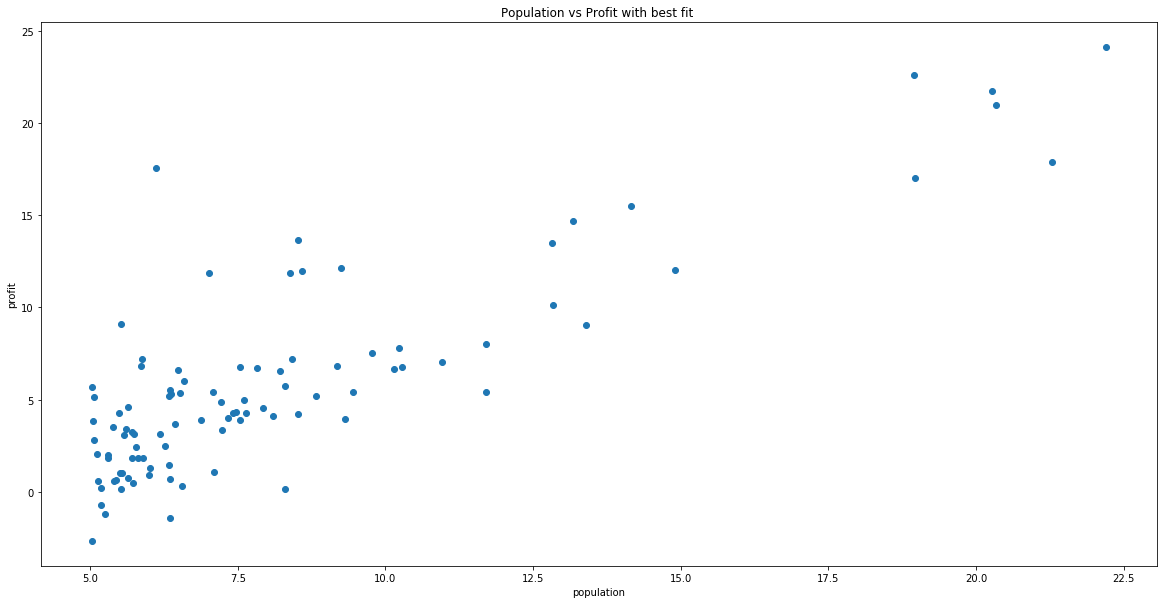

In [321]:
# visualize population vs profit data
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(X[:,1],y)
plt.plot(X[:,1],best_fit_y,'-')
plt.title('Population vs Profit with best fit ')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()